<a id='step1'></a>

 <div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <font color='green'> <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>

Илья, доброго дня! рад приветствовать тебя) <br />
<br />
Меня зовут Николай Шавлюго. <br />И на этом этапе твоего движения к новой профессии от меня будут комментарии по написанному коду. <br />Чтобы меньше "мусорить эфир" и чтобы максимально наглядно отделяться от основного кода, есть предложение условиться в некоторых обозначениях:<br /> <br />
<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ РЕВЬЮЕРА</b></u></p>
    <p>Всё хорошо.</p>
</div>

<div class="alert alert-warning" style="border-color: darkorange; border-radius: 5px">
    <p><u><b>⚠️ КОММЕНТАРИЙ РЕВЬЮЕРА</b></u></p>
    <p>Обрати внимание, есть потенциал</p>
</div>

<div class="alert alert-danger" style="border-color: darkred; border-radius: 5px">
    <p><u><b>❌ КОММЕНТАРИЙ РЕВЬЮЕРА</b></u></p>
    <p>Нужно ещё раз глянуть</p>
</div>
</font><br /><br />
<font color='green'>Моей целью является не "уличить" в не знании, а просто высказать сверху твоих знаний - свой опыт, что бы тебе использовать его для своего дальнейшего успеха) И очень здорово будет, если удастся задавать вопросы, да и вообще - всячески доставать меня, если я по каким-то причинам не приму проект:) При этом, из своего опыта скажу, хорошо и важно, когда переписка ревьюера и студента - сохраняется на следующие проекты и даже на будущую практическую деятельность.<br>
<BR> В ПУТЬ!<br></div>

# Определение возраста покупателей

# Содержание
<br>[ __Исследовательский анализ данных__](#step3)
   <br> - [ Датасет ](#step3)
   <br> - [ Изображения](#step4) 
<br>[ __Обучение модели__](#step5)
<br>[ __Анализ обученной модели__](#step6) 
<br>[ __Общий вывод__](#step7) 

<div style="border:solid green 2px; padding: 20px">
    
    
### Описание проекта   <a class="tocSkip">   


Сетевой супермаркет __«Хлеб-Соль»__ внедряет __систему компьютерного зрения__ для обработки фотографий покупателей. __Фотофиксация__ в прикассовой зоне поможет __определять возраст__ клиентов, чтобы:
- Анализировать покупки и предлагать товары, которые могут заинтересовать покупателей этой возрастной группы;
- Контролировать добросовестность кассиров при продаже алкоголя.

    
    
    
    
    
    
### Основная цель:<a class="tocSkip">   
    

  - На основании имеющихся в нашем распоряжении наборе фотографий людей с указанием возраста - Постройть и обучить свёрточную нейронную сеть, которая по __фотографии__ определит __приблизительный возраст человека__.   <br>   
    
    
- Полученная модель, должна иметь значения __MAE__ на тестовой выборке не больше __8__.
    
    
### Инструкция по выполнению проекта <a class="tocSkip">
    
- Проведите исследовательский анализ набора фотографий.<br>
- Подготовьте данные к обучению.<br>
- Обучите нейронную сеть и рассчитайть её качество.
    
</div>

<div style="border:solid green 2px; padding: 20px">
    
  


   
### Набор данных находится в файлах:<a class="tocSkip">
- `/datasets/faces/final_files/` — файлы со снимками людей.
- `/datasets/faces/labels.csv` — таблица с индексами фото из ***файла со снимками***, размеченная по возрастам.

   
    
### Описание данных <a class="tocSkip"> 

-  Столбец __file_name__  содержит снимки людей (общие признаки)    
    
### Целевой признак: <a class="tocSkip">
-  Столбец __real_age__ указывающий возраст людей     
    


</div>

In [1]:
import pandas as pd 
import numpy as np
from IPython.display import display
import seaborn as sns # подключение графической библиотеки seaborn
import matplotlib.pyplot as plt #импортируем библиотеку для графиков matplotlib 
from PIL import Image # модуль  загрузки изображений из файлов и создания новых изображений.
from matplotlib.pyplot import figure
import warnings # игнор ошибок
warnings.simplefilter('ignore')# отменяет вывод таблицы предупреждения ошибки
%matplotlib inline


from tensorflow.keras.preprocessing.image import ImageDataGenerator # импорт загрузчика для визуальных данных
from tensorflow.keras.applications.resnet import ResNet50 # импорт нейронной сети с архитектурой  ResNet50
from tensorflow.keras.layers import Conv2D, Flatten, Dense, AvgPool2D,  GlobalAveragePooling2D # импорт нейронных сетей
from tensorflow.keras.models import Sequential # инициализация модели в нейронных сетях
from tensorflow.keras.optimizers import Adam # алгоритм усредненного объединения


# from tqdm import notebook # индикатор прогресса
# %%script false # Пропустить выполнение ячейки
# raise SystemExit("Stop right there!") остановить выполнение ячейки

__Загрузка данных__

In [2]:
pd.set_option('display.float_format', '{:,.2f}'.format)# вывод без экспонентациальных форм и лишних запятых.
pd.set_option('display.max_columns', None) # вывод всех колонок датасета без урезания.

try: #конструкция try-except помогает выбрать работающий путь к исследуемым файлам
    
     df = pd.read_csv('/datasets/faces/labels.csv')# /Работа - сервер Яндекс/
            
except: #  
    df = pd.read_csv('/data_set/CompZrenie/df.csv') # /Работа - Локально/



<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ РЕВЬЮЕРА</b></u></p>ОК!

<a id='step3'></a>

## Исследовательский анализ данных

### __Датасет__ - анализ
[&#10224;](#step1)

***Исследуем полученный датасет df***

In [3]:
l = [df]# с помощью цикла пройдемся по исследуемому датасету,выведем результаты  проверок.
for i in l:
    
    object_featur = i.shape[0:2]
    columns = ['строк',  'столбцов'] #Объеденим полученные результаты в таблицу
    object_featur = pd.DataFrame([object_featur], columns = columns)
    display("Общая информация по датафрейму:",object_featur,i,print("________________________________"))
    display(print("Типы данных:"),i.info())# смотрим на типы даннх
    display("Количество обнаруженных дубликатов:",i.duplicated().sum())# проверим полученные таблицы на дубликаты
    # код ниже находит и оформляет в таблицу пропущенные значения
    report = i.isna().sum().to_frame()
    report = report.rename(columns = {0: 'missing_values'})
    report['% of total'] = (report['missing_values'] / i.shape[0]*100).round(2)
    display('Пропущенных значений в таблице :',(report.sort_values(by = 'missing_values', ascending = False).reset_index()))

________________________________


'Общая информация по датафрейму:'

,строк,столбцов
0,7591,2


,file_name,real_age
0,000000.jpg,4
1,000001.jpg,18
2,000002.jpg,80
3,000003.jpg,50
4,000004.jpg,17
...,...,...
7586,007608.jpg,14
7587,007609.jpg,37
7588,007610.jpg,28
7589,007611.jpg,20


None

Типы данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7591 entries, 0 to 7590
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   file_name  7591 non-null   object
 1   real_age   7591 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 118.7+ KB


None

None

'Количество обнаруженных дубликатов:'

0

'Пропущенных значений в таблице :'

,index,missing_values,% of total
0,file_name,0,0.00
1,real_age,0,0.00


In [4]:
 df.describe() # делаем цифровой анализ столбца real_age

,real_age
count,"7,591.00"
mean,31.20
std,17.15
min,1.00
25%,20.00
50%,29.00
75%,41.00
max,100.00


In [5]:
# сгруппируем имеющиеся столбцы по real_age посмотрим соотношение real_age и file_name
df.pivot_table(index='real_age', values='file_name', aggfunc=['count']).T

,real_age,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,93,94,95,96,97,100
count,file_name,149,88,25,101,87,68,67,44,34,45,51,56,79,125,128,193,163,193,180,178,143,179,213,211,315,226,229,217,164,317,129,174,144,156,147,122,144,124,107,167,98,99,85,96,88,74,93,66,74,156,70,76,45,44,51,41,37,54,41,75,28,28,20,23,36,18,18,15,18,50,10,13,10,6,17,7,8,3,6,31,3,5,3,8,12,3,6,3,4,21,1,1,5,2,2,1,1


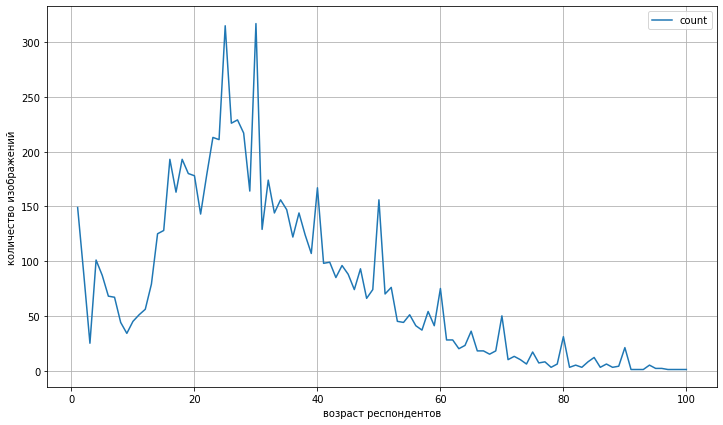

In [6]:
df.groupby('real_age')['file_name'].agg(['count']).plot(figsize=(12, 7),grid=True)
plt.xlabel("возраст респондентов")
plt.ylabel("количество изображений")
plt.show()

 ***Построим гистограмму распределения и боксплот по возрасту  и количеству изображений респондентов.***

______________________________________________________________________________________________


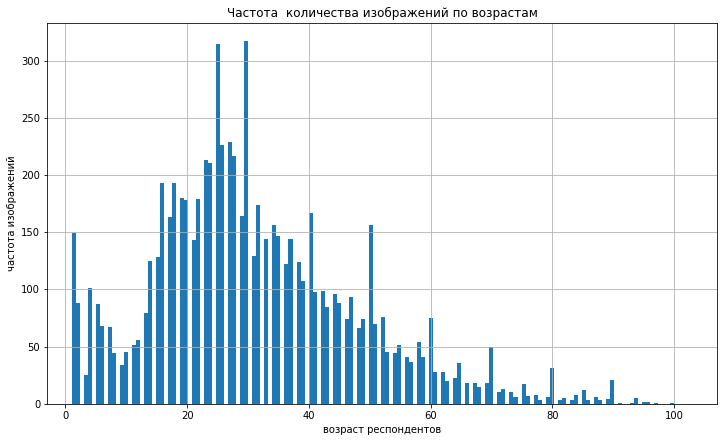

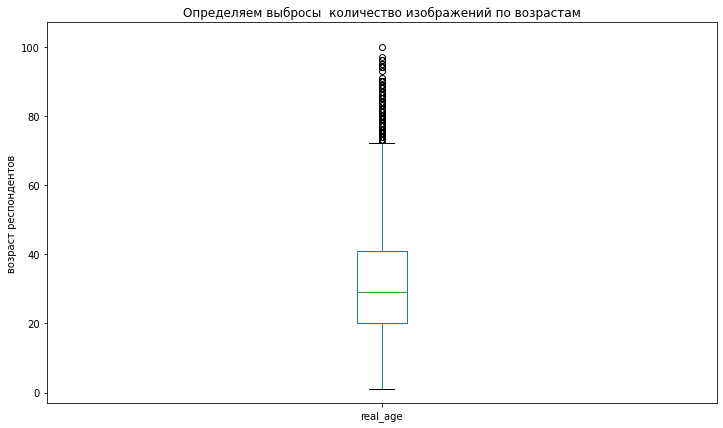

In [7]:
# Для оценивания выбросов строим боксплот
print('______________________________________________________________________________________________')
df['real_age'].hist(bins= 150,figsize=(12, 7)).set_title('Частота  количества изображений по возрастам')
plt.xlim(-3,107)

plt.xlabel("возраст респондентов")
plt.ylabel("частота изображений")
plt.show()



df.plot(y='real_age', kind='box', figsize=(12, 7),title='Определяем выбросы  количество изображений по возрастам')
plt.ylim(-3,107)
plt.xlim(0, 2) 
plt.ylabel("возраст респондентов")
plt.show()




<div style="border:solid green 2px; padding: 20px">
    

**Вывод** <br>
    

  __Исследовав полученный датасет df можно сделать следующие выводы:__<br>
    Имеем таблицу состоящую из __7591__ строки с __объектами исследования__ и __2-х__ столбцов  с __признаками__. Предварительная обработка показала, что __типы данных__ у исследуемых столбцов __file_name__ и __real_age__ - корректны, отсутствуют __дубликаты__ и __пропуски__.<br>
    Проанализировав распределение возрастов респондентов по их количеству можно заметить, что в целом, распределение нормальное, сконцентрированно вокруг среднего значения возраста в районе __30 лет__, но есть и выбросы по краям возрастной группы.<br>
    Так например, возраст __1 год__ , имеет __149__ изображений респондентов, тогда как   группа от __91 до 100__ лет в среднем - всего __1.85__ изображений.Возможно, моделе из-за столь малых данных, будет сложней обучиться качественно определять возраст данных групп респондентов. <br>
    Было обращено внимание на несовпадение индексов с нумерацией изображений.  Индексов - __7591__  изображений -  __7612__
    
</div>

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ РЕВЬЮЕРА</b></u></p>
СУПЕР, согласен с выводами!!!!! чётко всё.

<a id='step4'></a>

## __Изображения__ - анализ
[&#10224;](#step1)

***Исследуем полученные изображения респондентов***

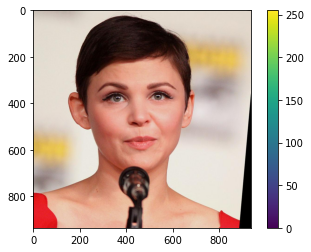

(936, 936, 3)
(936, 936, 3)


In [8]:
# загрузим для анализа любое изображение 
image = Image.open('/datasets/faces/final_files/005617.jpg')
array = np.array(image)
plt.imshow(np.array(image))

plt.colorbar() # добавим колорбар
plt.show()
print(array.shape) # смотрим размер массива в изображении
array_0_255 = array # значения цветов от 0 до 255
array_0_1 = array/255 # переводм значения цветов от 0 до 1
print(array_0_1.shape) # смотрим размер массива в изображении

In [9]:
# от англ. data generator
train_datagen = ImageDataGenerator(rescale=1./255)

# загружаем изображения в тренировочную выборку
train_gen_flow = train_datagen.flow_from_dataframe(
        dataframe=df,
        # папка, в которой хранится датасет
        directory='/datasets/faces/final_files/',
        x_col='file_name',
        y_col='real_age',
        # к какому размеру приводить изображения
        target_size=(224, 224),
        # размер батча
        batch_size=32,
        # указываем, что это загрузчик для обучающей выборки
        #subset='training',
        class_mode='raw',
        seed=12345) 
#features, target = next(train_gen_flow)

Found 7591 validated image filenames.


In [10]:
# посмотрим на получившиеся параметры, - размеры изображений и батчей.
for data_batch, labels_batch in train_gen_flow:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (32, 224, 224, 3)
labels batch shape: (32,)


Получили 

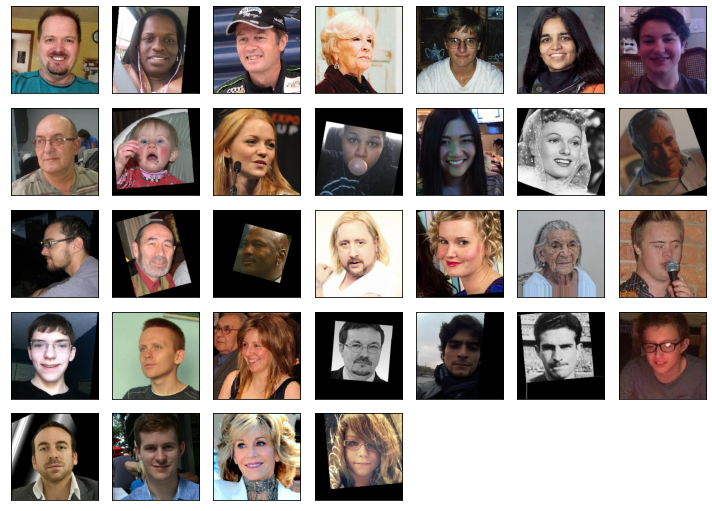

In [11]:
# посмотрим на изображения в  одном батче
fig = plt.figure(figsize=(10,10))
for i in range(32):
    fig.add_subplot(7, 7, i+1)
    plt.imshow(data_batch[i])
# для компактности удаляем оси и прижимаем изображения друг к другу
    plt.xticks([])
    plt.yticks([])
    plt.tight_layout()

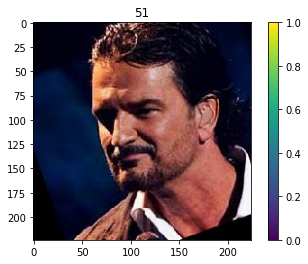

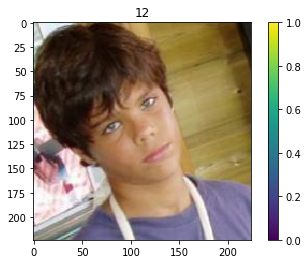

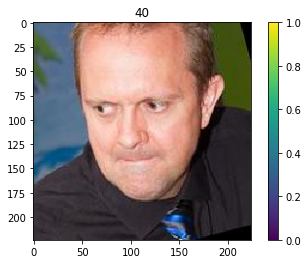

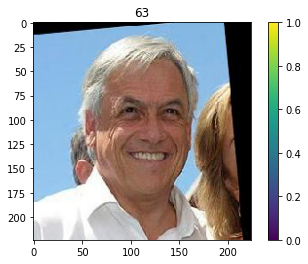

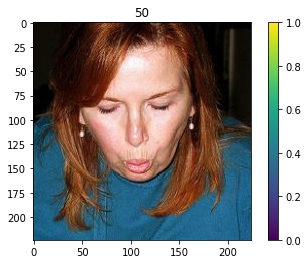

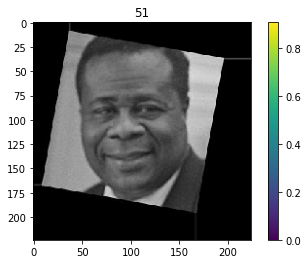

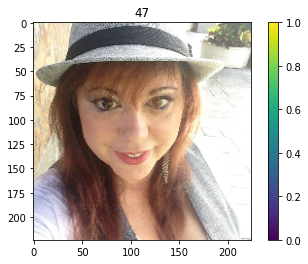

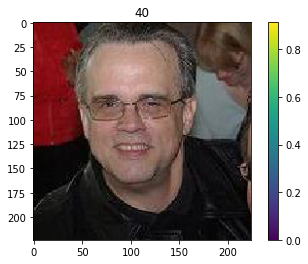

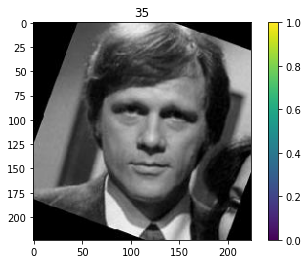

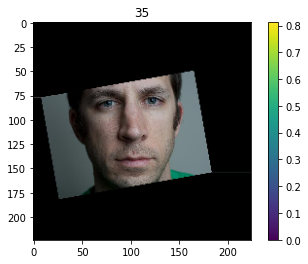

In [12]:
# посмотрим на 10 изображений с уазанием размеров, возраста, и колор бара.
features, target = next(train_gen_flow)
for age, photo in zip(target[:10], features[:10]):
    plt.figure()
    plt.title(age)
    plt.imshow(photo)
    plt.colorbar()

In [13]:
df.head(7612).T

0           1           2           3           4     \
file_name  000000.jpg  000001.jpg  000002.jpg  000003.jpg  000004.jpg   
real_age            4          18          80          50          17   

                 5           6           7           8           9     \
file_name  000005.jpg  000006.jpg  000007.jpg  000008.jpg  000009.jpg   
real_age           27          24          43          26          39   

                 10          11          12          13          14    \
file_name  000010.jpg  000011.jpg  000012.jpg  000013.jpg  000014.jpg   
real_age           17          51           2           1           6   

                 15          16          17          18          19    \
file_name  000015.jpg  000016.jpg  000017.jpg  000018.jpg  000019.jpg   
real_age           18          24           5          40          16   

                 20          21          22          23          24    \
file_name  000020.jpg  000021.jpg  000022.jpg  000023.jpg  000024.jpg   
real_age           29           1          35          25           5   

                 25          26          27          28          29    \
file_name  000025.jpg  000026.jpg  000027.jpg  000028.jpg  000029.jpg   
real_age           30          24          35          65          13   

                 30          31          32          33          34    \
file_name  000030.jpg  000031.jpg  000032.jpg  000033.jpg  000034.jpg   
real_age            1          28          27          16           4   

                 35          36          37          38          39    \
file_name  000035.jpg  000036.jpg  000037.jpg  000038.jpg  000039.jpg   
real_age           16           2          31          10           4   

                 40          41          42          43          44    \
file_name  000040.jpg  000041.jpg  000042.jpg  000043.jpg  000044.jpg   
real_age            1          34          15          30           8   

                 45          46          47          48          49    \
file_name  000045.jpg  000046.jpg  000047.jpg  000048.jpg  000049.jpg   
real_age           20          16          19          40          10   

                 50          51          52          53          54    \
file_name  000050.jpg  000051.jpg  000052.jpg  000053.jpg  000054.jpg   
real_age           42          23          25           1          58   

                 55          56          57          58          59    \
file_name  000055.jpg  000056.jpg  000057.jpg  000058.jpg  000059.jpg   
real_age           23          44           7          21          14   

                 60          61          62          63          64    \
file_name  000060.jpg  000061.jpg  000062.jpg  000063.jpg  000064.jpg   
real_age           28          24          10          40          26   

                 65          66          67          68          69    \
file_name  000065.jpg  000066.jpg  000067.jpg  000068.jpg  000069.jpg   
real_age           34          48          39           5          24   

                 70          71          72          73          74    \
file_name  000070.jpg  000071.jpg  000072.jpg  000073.jpg  000074.jpg   
real_age           27          45          24          21          24   

                 75          76          77          78          79    \
file_name  000075.jpg  000076.jpg  000077.jpg  000078.jpg  000079.jpg   
real_age           24          26          14          17           2   

                 80          81          82          83          84    \
file_name  000080.jpg  000081.jpg  000082.jpg  000083.jpg  000084.jpg   
real_age           27          23          25          18          58   

                 85          86          87          88          89    \
file_name  000085.jpg  000086.jpg  000087.jpg  000088.jpg  000089.jpg   
real_age           51          25          29          37          50   

                 90          91          92          93  

<div style="border:solid green 2px; padding: 20px">
    
**Вывод** <br>
    
Видим, что загрузка с заданными параметрами через  __ImageDataGenerator__ произведена корректно, получилил __батчи__ состоящие из __32__ снимков размером __224х224 с 3-мя каналами__. Общее количество изображений составило 7591 файлов в __jpg__ формате.  Обратили внимание, что индексы с номерами изображений перестают совпадать со строки 5851 так как отсутствует фото под номером 005851 из чего можно сделать вывод, что из датасета было удалено 21 изображение. На процесс обучения модели это влияния не окажет.

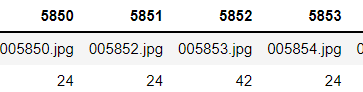    
    
   
Полученные изображения не однородны. Есть черно-белые снимки, у некоторых фотографий есть повороты, размеры меньше рамок, различная насыщенность.<br>
</div>

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ РЕВЬЮЕРА</b></u></p>ОК, отлично. Ещё можно такую аналитику оставить:<br>
1) В датасете есть старые и черно-белые фотографии. Имеет смысл делать аугментацию с тем, чтобы делать фотографию черно-белой в некотором проценте случаев (нету в стандартном наборе). Возможно, стоит подкрутить цветовые каналы или яркость<br>

2) В датасете есть фотогарафи, на которых лица изображены под разными углами к вертикальной оси. Имеет смысл делать аугментацию с rotation_range равным +-15-20 градусов в некотором проценте случаев. Поворачивать можно как само изображение так и объект отдельно от фона<br>

3) В датасете есть фотогарафи, на которых лица изображены в полупрофиль. Имеет смысл делать аугментацию с отражением по горизонтали в некотором проценте случаев<br>

4) В датасете есть фотогарафи с разным разрешением. Имеет смысл делать аугментацию с изменением контрастности изображения в некотором проценте случаев<br>

5) В датасете есть фотогарафи, на которых изображены не лица, а голова и часть туловища (иногда человек послностью). Имеет смысл делать аугментацию с обезкой и масштабированием изображения в некотором проценте случаев, чтобы на фото были только лица примерно одного масштаба<br>

<a id='step3'></a>

<a id='step5'></a>

## Обучение модели
[&#10224;](#step1)

   Создаем функции __load_train()__ и __load_test()__ в которых сохраняем в переменную __labels__ выше исследованную таблицу __df__.  Загружаем через  __ImageDataGenerator__   визуальные данные для обучающей и тестовой выборки. Подбираем гиперпараметры.  Методом __flow_from_dataframe__  читаем файлы и метки, как указано в  __labels__. Результаты сохраняем в __train_datagen_flow__(обучающая) и __valid_datagen_flow__(тестовая) выборки.

In [14]:
def load_train(path):
    labels = pd.read_csv(path +'labels.csv')
    train_datagen = ImageDataGenerator(validation_split=0.25,rescale=1./255,horizontal_flip=True,)
#                                        vertical_flip=True, 
#                                        rotation_range=40, 
#                                        width_shift_range=0.2,
#                                        height_shift_range=0.2        
                                       #height_shift_range=0.2,
                                       #shear_range=0.2,
                                       #zoom_range=0.2,
                                       #fill_mode='nearest')

 
    train_datagen_flow = train_datagen.flow_from_dataframe(
        dataframe=labels,
        directory=path +'final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=32,
        class_mode='raw',
        subset='training',
        seed=42)        

    
    return train_datagen_flow

def load_test(path):
    labels = pd.read_csv(path +'labels.csv')
    valid_datagen = ImageDataGenerator(validation_split=0.25,rescale=1./255)
        
    valid_datagen_flow = valid_datagen.flow_from_dataframe(
        dataframe=labels,
        directory=path +'final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=32,
        class_mode='raw',
        subset='validation',
        seed=42)        
           
    return valid_datagen_flow

Через функцию __create_model()__ с классом __Sequential__ (англ. «последовательный») - инициализируем модель, нейронную сеть, которую  строим. __Sequential__ этот класс  в которых слои идут последовательно — набор нейронов с общим входом и выходом.
- В качестве  нейронной сети, используем модификацию с архитектурой __ResNet50__ где 50 - чило слоев. Последние два слоя нужны для следующего- __GlobalAveragePooling2D__, чтобы усреднить информацию по всему изображению, __Dense__ — полносвязный слой для классификации.
- Через аргумента __input_shape__ передадим размер входящего изображения (224, 224, 3). Для инициализации весов, применим  предобученную на __ImageNet__ сеть.
- Метод __model.compile()__  готовит модель к обучению.  В параметре __loss__ укажем функцию потерь для задачи __регрессии__ — __'mean_squared_error'__. В параметре __optimizer__ испльзуем алгоритм __Adam__ (адаптивность на основе оценки моментов) со скоростью обучения __learning_rate__ = 0.0005  


In [15]:
def create_model(input_shape): 
    # создаём модель
    model = Sequential()
    # указываем, как устроена нейронная сеть
    backbone = ResNet50(input_shape=input_shape, 
                        weights='imagenet',
                        include_top=False)
    # weights='/datasets/keras_models/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5'
    # weights=None - будут подобраны собственные веса weights='imagenet' - все веса из ImageNet 
    # backbone (англ. «костяк») — то, что осталось от ResNet50.    
    # backbone.trainable = False # замораживаем ResNet50 без верхушки
    model.add(backbone)
    model.add(GlobalAveragePooling2D())
    model.add(Dense(1, activation='relu')) 
    
    # model = ResNet50(input_shape=None,classes=1000,include_top=True, weights='imagenet')
    # input_shape — размер входного изображения. Например: (224, 224, 3).
    # classes=1000 — количество нейронов в последнем полносвязном слое, в котором выполняется классификация.
    # weights='imagenet' (от англ. «сеть изображений») — инициализация весов. ImageNet — название большого датасета,
    # на котором сеть обучалась классифицировать изображения на 1000 классов. Если обучение сети начать на ImageNet,
    # а продолжить на вашей задаче, результат будет лучше, чем если обучать с нуля. Чтобы инициализация весов была 
    # случайной, напишем weights=None.
    # include_top=True (англ. «добавить верхушку») — указание на то, что в конце архитектуры ResNet есть два слоя:
    # GlobalAveragePooling2D и Dense. Если задать False, то этих слоёв не будет.

    # указываем, как обучается нейронная сеть
    optimizer = Adam(learning_rate=0.0005) # 
    model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae'])
    #model.compile(optimizer=optimizer, loss='mean_absolute_error', metrics=['mae'])     
    #model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
    
    return model

Через функцию __train_model()__ запустим обучение подготовленной  модели. В качестве аргументов передадим на обучение ранее созданные функции с самой послойно собранной моделью, общей и тренировочной выборками, количеством эпох, батчей, шагов в steps_per_epoch и validation_steps.

In [16]:
def train_model(model, train_data, test_data, batch_size=None, epochs=10,
               steps_per_epoch=None, validation_steps=None):
    global history
    if steps_per_epoch is None:
        steps_per_epoch = len(train_data)
    if validation_steps is None:
        validation_steps = len(test_data)
    # обучаем модель
    history = model.fit(train_data,
              validation_data= test_data,
              batch_size=batch_size, epochs=epochs,
              steps_per_epoch=steps_per_epoch,
              validation_steps=validation_steps,
              verbose=2, ) #shuffle=True
    
    model.summary()    

    return model

Запустим выполнение ранее созданных функций

In [ ]:
%%script false # Пропустить выполнение ячейки. Код запускается на аппаратном ускорителе с GPU
if __name__ == "__main__":
    train_model(create_model((224, 224, 3)), load_train('/datasets/faces/'), load_test('/datasets/faces/'))    


<a id='step6'></a>

## Анализ обученной модели
[&#10224;](#step1)

### При обучении модели были получены, после тестования, следующие  финальные  результаты:<a class="tocSkip">

Для нахождения оптимальной  модели,  были собраны  конфигурации нейронных сетей с одинаковыми параметрами, метриками
и протестированы с разными функциями потерь - loss='mean_absolute_error' (Средняя абсолютная ошибка) 
и loss='mean_squared_error' (Средняя квадратная ошибка)

### Финальный результат <a class="tocSkip">

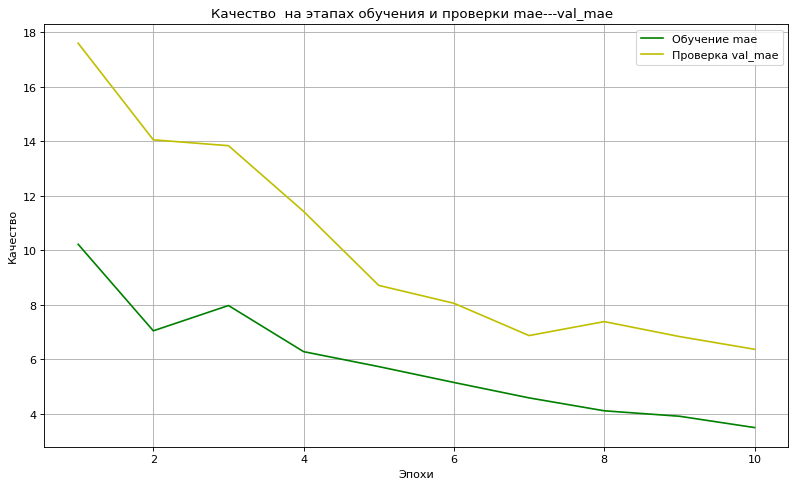

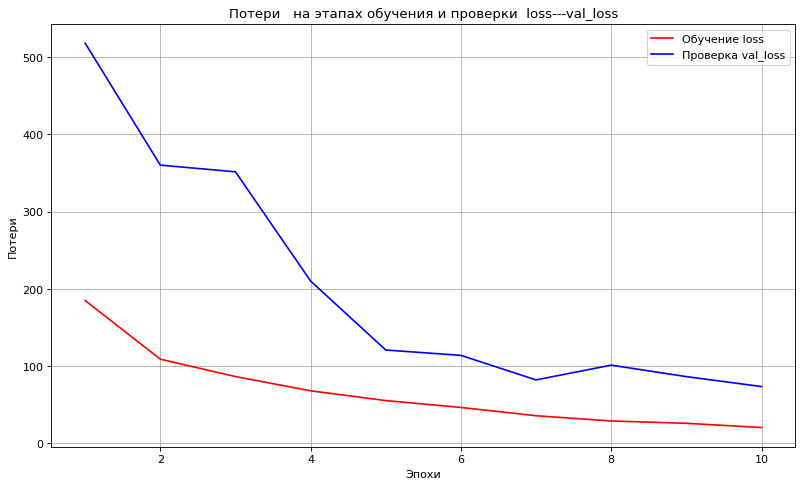

In [18]:
#Вывод графиков 
figure(figsize=(12, 7), dpi=80)

# mae = history.history['mae']
# val_mae = history.history['val_mae']
# loss = history.history['loss']
# val_loss = history.history['val_loss']

loss = [184.9759,109.0673,86.5743,68.1581,55.5014,46.6275,35.8960,29.1134,26.1160,20.5945]   

mae = [10.2246,7.0519,7.9795,6.2877,5.7392,5.1573,4.5919,4.1183,3.9185,3.5033]

val_loss = [517.9827,360.2132,351.5349,210.1747,120.9357,113.9966,82.2598,101.3776,86.4916,73.6477]   

val_mae = [17.6012,14.0573,13.8420,11.4305,8.7173,8.0622,6.8775,7.3894,6.8419,6.3749] 

epochs_mae = range(1, len(mae) + 1)
epochs_val_mae = range(1, len(val_mae) + 1)
epochs_loss = range(1, len(loss) + 1)
epochs_val_loss = range(1, len(val_loss) + 1)

plt.plot(epochs_mae, mae, 'g', label='Обучение mae')
#plt.plot(epochs_loss, loss, 'r', label='Обучение loss')
plt.plot(epochs_val_mae, val_mae, 'y', label='Проверка val_mae')
#plt.plot(epochs_val_loss, val_loss, 'b', label='Проверка val_loss')

plt.title('Качество  на этапах обучения и проверки mae---val_mae  ')
plt.xlabel('Эпохи')
plt.ylabel('Качество')
plt.grid()
plt.legend()
plt.show()

figure(figsize=(12, 7), dpi=80)
#plt.plot(epochs_acc, acc, 'g', label='Обучение acc')
plt.plot(epochs_loss, loss, 'r', label='Обучение loss')
#plt.plot(epochs_val_acc, val_acc, 'y', label='Проверка val_acc')
plt.plot(epochs_val_loss, val_loss, 'b', label='Проверка val_loss')

plt.title('Потери   на этапах обучения и проверки  loss---val_loss')
plt.xlabel('Эпохи')
plt.ylabel('Потери')

plt.grid()
plt.legend()
plt.show()

<a id='step7'></a>

## Общий вывод<a class="tocSkip">
[&#10224;](#step1)


 <div style="border:solid green 2px; padding: 20px">
    
    
   На этапе обученя модели,  в функциях  load_train() и load_test()  загрузили таблицу с данными,а также через __ImageDataGenerator__ визуальные данные для обучающей и тестовой выборки. Методом __flow_from_dataframe__ прочитали файлы и метки.<br>
-   Далее в функции __create_model()__  инициализировали собранную   модель. Используем модификацию нейронной сети, с архитектурой __ResNet50__ с дополнительными слоями __GlobalAveragePooling2D__ и __Dense__ c функцией активации activation='relu'. Предобученную на ImageNet сеть, испльзуем для инициализации весов в нашей модели. Аргументом  __input_shape__ передадим размер входящего изображения. Через метод __model.compile()__, для тестирования модели, использовали поочередно 2-е функции потерь, для задачи регрессии. 'mean_squared_error' и 'mean_absolute_error'. В параметре __optimizer__ использовали алгоритм __Adam__ со скоростью обучения __learning_rate__ = 0.0005<br>
-   На завершающем этапе, через функцию __train_model()__, запустили обучение подготовленной модели, передав в качестве аргументов, значения ранее созданных функций, а так же количеством эпох, батчей, шагов в steps_per_epoch и validation_steps.<br>
-   Полученная оптимальная модель, была сформирована в результате многочисленных тестов, показания которых, было решено отразить из найденных 2 __двух__ самых удачных решений, а именно это  __РЕЗУЛЬТАТ ОБУЧЕНИЯ № 1__ где в качестве функции потерь используем __loss='mean_absolute_error'__ (Средняя абсолютная ошибка) здесь результат качеств на валидационной выборке составил __val_mae: 6.8396__  и __РЕЗУЛЬТАТ ОБУЧЕНИЯ № 2__ с ипользованием качестве функции потерь качества    __loss='mean_squared_error'__ (Средняя квадратная ошибка) - данное решение показало наилучший результат -  __val_mae: 6.3749__ что удовлетворяет условию поставленной пред исследованем задачей. Полученная модель, должна иметь значения MAE на тестовой выборке не больше __8__. Оба решения с различными функциями потерь, показали хорошее проверочное качество, можно также заметить, что их обучение после 6-й эпохи можно было остановить.
    
Возвращаясь к основнай цели проекта можно заключить следующее:
    
- Заказчику проекта от  супермаркет __«Хлеб-Соль»__, для внедрения системы __компьютерного зрения__, определющую возраст клиента,  рекомендуется  использовать полученную нами __сверточную нейронную сеть__ на основе архитектуры __ResNet50__ с функцией потерь качества    __loss='mean_squared_error'__ показавшую результат на  __val_mae: 6.3749__
    
     
    
  
</div>

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ РЕВЬЮЕРА</b></u></p>
ОК, ИЛЬЯ, классный проект сделал: и с оформлением, и с аналитикой, и с выводами! Навреное, не простой проект в плане понимания как и почему отбирается модель.<br>
Возможно, и не все тайны этой темы раскрылись перед тобой на этом курсе.<br>
Но, думаю, если надо ты сможешь применить эти знания и, принеобходимости, нарастить.<br>
Как говорила мне в детстве моя бабушка "мужчина не обязательно должен уметь всё делать, но вот знать как делать - должен")))<br><br>
Сравнить тут не с чем, не предумотрено( Только с целевой по задаче. Возможно, что не хватает некоего анализа ошибки. Если бы была возможность, то здорово провести его: сравнить прогноз и факт. Это позволит посмотреть: а на каких возрастах модель ошибается чаще всего? Каких фото ещё было бы не плохо добавить в выборку для дообучения? Наверняка, там где фоток больше - там точнее, пожет и 2-3 года ошибка.. А на 100-летних - ошибка (я фантазирую) 20 лет. И тогда в итоге соредняя - как сейчас...  Вообще при любом моделировании - анализ ошибки - это "кландайк" разных интересных открытий может быть. Лучше всегда его проводить.<br>

Оставил несколько комментариев по аналитике. Посмотри, пожалуйста. Не стал уже из-за этого отсылать на доработку.. Впереди финал у тебя)<br>    
    
УСПЕХОВ В НЁМ!

## Чек-лист<a class="tocSkip">


- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Исследовательский анализ данных выполнен
- [x]  Результаты исследовательского анализа данных перенесены в финальную тетрадь
- [x]  MAE модели не больше 8
- [x]  Код обучения модели скопирован в финальную тетрадь
- [x]  Результат вывода модели на экран перенесён в финальную тетрадь
- [x]  По итогам обучения модели сделаны выводы

#    <br>[**В начало**](#step1)